GM: [2.92]
PM: [0.94] rad or [53.81] deg
wb: [0.1]
wc: [0.15]
wbt: [0.3533]


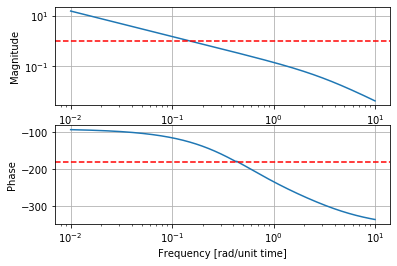

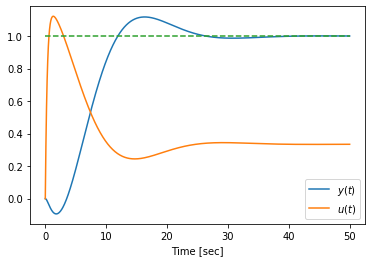

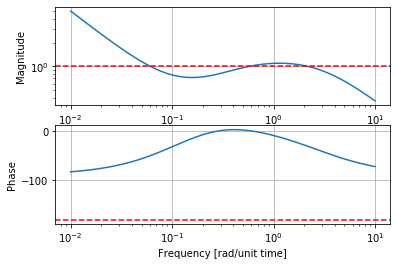

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

from utils import tf, feedback, marginsclosedloop
from utilsplot import bode, step_response_plot

# Loop shaping is an iterative procedure where the designer
# 1. shapes and reshapes |L(jw)| after computing PM and GM,
# 2. the peaks of closed loop frequency responses (Mt and Ms),
# 3. selected closed-loop time responses,
# 4. the magnitude of the input signal
#
# 1 to 4 are the important frequency domain measures used to assess
#   performance and characterise speed of response

s = tf([1, 0], 1)

Kc = 0.05
# plant model
G = 3*(-2*s + 1)/((10*s + 1)*(5*s + 1))
# Controller model
K = Kc*(10*s + 1)*(5*s + 1)/(s*(2*s + 1)*(0.33*s + 1))
# closed-loop transfer function
L = G*K

# magnitude and phase of L
plt.figure('Figure 2.19')
bode(L, -2, 1)

# From the figure we can calculate w180
#         w180 = 0.44
GM, PM, wc, wb, wbt, valid = marginsclosedloop(L)
print('GM:', np.round(GM, 2))
print('PM:', np.round(PM*np.pi/180, 2), "rad or", np.round(PM, 2), "deg")
print('wb:', np.round(wb, 2))
print('wc:', np.round(wc, 2))
print('wbt:', np.round(wbt, 4))

# Response to step in reference for loop shaping design
# y = Tr, r(t) = 1 for t > 0
# u = KSr, r(t) = 1 for t > 0

plt.figure('Figure 2.20')
T = feedback(L, 1)
S = feedback(1, L)
u = K*S
step_response_plot(T, u, 50, 0)

# magnitude and phase of K
plt.figure('Figure 2.21')
bode(K, -2, 1)
plt.show()
